In [45]:
from zipfile import ZipFile
import urllib
import urllib.request

import numpy as np
import cv2
import os

import matplotlib.pyplot as plt

In [46]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'
if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE} ...')
    urllib.request.urlretrieve(URL, FILE)
print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)
print('Done!')

Unzipping images...
Done!


In [47]:
# Loads a MNIST dataset
def localLoadFashionMNIST(path, dataset):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))

    # Create lists for samples and labels
    X = []
    y = []

    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(label)

    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

# MNIST dataset (train + test)
def loadDataset(path):
    # Load both sets separately
    X, y = localLoadFashionMNIST(path, 'train')
    X_test, y_test = localLoadFashionMNIST(path, 'test')

    # And return all the data
    return X, y, X_test, y_test

In [48]:
# Label index to label name relation
fashionMnistLabels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [49]:
# Create dataset
X, y, X_test, y_test = loadDataset('fashion_mnist_images')

# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [50]:
originalX = X.copy()
originalX_test = X_test.copy()

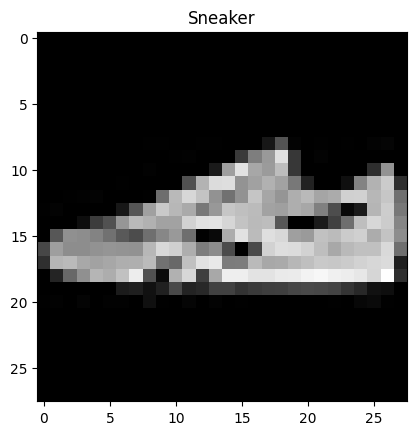

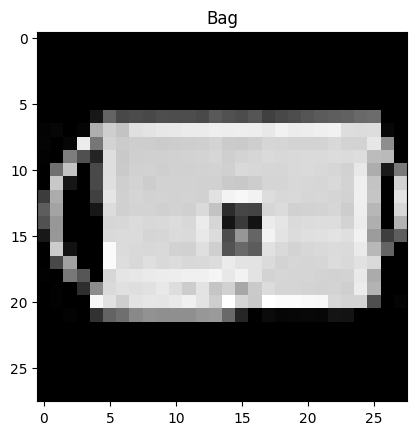

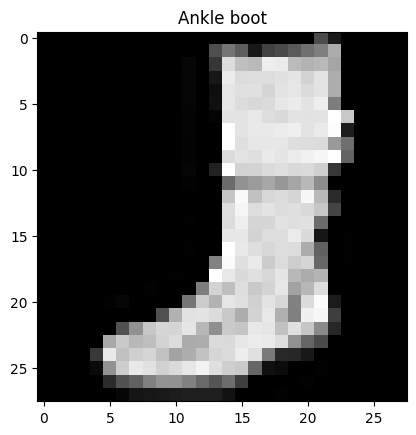

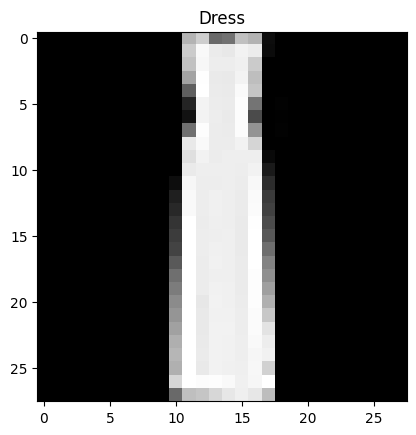

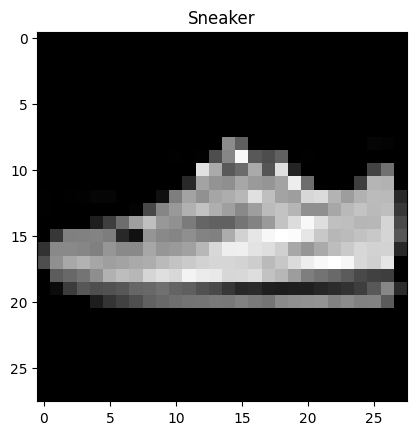

In [51]:
# This code block is used to display 5 random images from the dataset
randomIndices = np.random.choice(originalX.shape[0], 5, replace=False)

for idx in randomIndices:
    plt.imshow(originalX[idx], cmap='gray')
    plt.title(fashionMnistLabels[y[idx]])
    plt.show()
    

In [52]:
# Scale and reshape samples
# We subtract 127.5 and divide by 127.5 so the values are in the range of [-1, 1]
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5

In [53]:
# Main Imports of our custom neural network library

from ApexNetLibrary import ApexNetModel
import ApexNetLibrary as apex

In [54]:
# Instantiate the model
model = ApexNetModel()

In [55]:
# Add layers
model.add(apex.DenseLayer(X.shape[1], 128))
model.add(apex.ReLUActivation())
model.add(apex.DenseLayer(128, 128))
model.add(apex.ReLUActivation())
model.add(apex.DenseLayer(128, 10))
model.add(apex.SoftmaxActivation())

In [56]:
# Set loss, optimizer and accuracy objects
model.set(
    loss=apex.CategoricalCrossEntropyLoss(),
    optimizer=apex.AdamOptimizer(lrDecay=1e-3),
    accuracy=apex.categoricalAccuracy()
)


In [57]:
# Train the model
model.train(X, y, epochs=10, batch_size=128, printFrequency=100)

epoch: 1
Step: 0
Accuracy: 10.156
Total Loss: 3.886
  - Data Loss: 3.886
  - Regularization Loss: 0.000
Learning Rate: 0.001
----------------------------------------
Step: 100
Accuracy: 80.469
Total Loss: 0.612
  - Data Loss: 0.612
  - Regularization Loss: 0.000
Learning Rate: 0.0009090909090909091
----------------------------------------
Step: 200
Accuracy: 82.812
Total Loss: 0.478
  - Data Loss: 0.478
  - Regularization Loss: 0.000
Learning Rate: 0.0008333333333333334
----------------------------------------
Step: 300
Accuracy: 79.688
Total Loss: 0.454
  - Data Loss: 0.454
  - Regularization Loss: 0.000
Learning Rate: 0.0007692307692307692
----------------------------------------
Step: 400
Accuracy: 83.594
Total Loss: 0.454
  - Data Loss: 0.454
  - Regularization Loss: 0.000
Learning Rate: 0.0007142857142857143
----------------------------------------
Step: 468
Accuracy: 86.458
Total Loss: 0.486
  - Data Loss: 0.486
  - Regularization Loss: 0.000
Learning Rate: 0.000681198910081744
-

In [58]:
# Evaluate the model on the test/val set
model.evaluate(X_test, y_test)

Validation:
Accuracy: 87.800
Loss: 0.343
-----------------------------------------------------------------------------------------


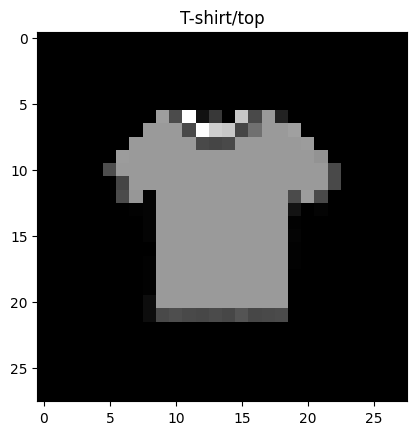

In [59]:
# This is to test the model on a single image of our choice

# Read an image
image_data = cv2.imread('tshirt-2.png', cv2.IMREAD_GRAYSCALE)

# Resize to the same size as Fashion MNIST images
image_data = cv2.resize(image_data, (28, 28))

# Invert image colors (make it white on black) if needed
image_data = 255 - image_data

# Save a copy of the original image for display later
originalImage = image_data.copy()

# Reshape and scale pixel data same way as MNIST images
image_data = (image_data.reshape(1, -1).astype(np.float32) - 127.5) / 127.5

# Predict on the image
confidences = model.predict(image_data)

# Get prediction instead of confidence levels (class with highest probability)
predictions = model.lastLayerActivation.predictions(confidences)

# Get label name from label index
prediction = fashionMnistLabels[predictions[0]]

plt.imshow(originalImage, cmap='gray')
plt.title(prediction)
plt.show()